In [77]:
import pandas as pd
df = pd.read_csv('flavors_of_cacao.csv')
df.head(5)

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [79]:
df.shape
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1795 rows and 9 columns


In [81]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [83]:
#Renaming column names 
df=df.rename(columns = {'Company \n(Maker-if known)': 'Company',
                        'Specific Bean Origin\nor Bar Name': 'SpecificBean',
                        'Review\nDate': 'ReviewDate',
                        'Cocoa\nPercent': 'CocoaPercent',
                        'Company\nLocation': 'CompanyLocation',
                        'Bean\nType': 'BeanType',
                        'Broad Bean\nOrigin':'BroadBeanOrigin'})   
              
df.columns       
                        

Index(['Company \n(Maker-if known)', 'SpecificBean', 'REF', 'ReviewDate',
       'CocoaPercent', 'CompanyLocation', 'Rating', 'BeanType',
       'BroadBeanOrigin'],
      dtype='object')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company 
(Maker-if known)  1795 non-null   object 
 1   SpecificBean               1795 non-null   object 
 2   REF                        1795 non-null   int64  
 3   ReviewDate                 1795 non-null   int64  
 4   CocoaPercent               1795 non-null   object 
 5   CompanyLocation            1795 non-null   object 
 6   Rating                     1795 non-null   float64
 7   BeanType                   1794 non-null   object 
 8   BroadBeanOrigin            1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [87]:
df.isna().sum()  #To sum the total of null values

Company \n(Maker-if known)    0
SpecificBean                  0
REF                           0
ReviewDate                    0
CocoaPercent                  0
CompanyLocation               0
Rating                        0
BeanType                      1
BroadBeanOrigin               1
dtype: int64

In [93]:
#Replacing missing values with unknown
df.fillna({'BeanType': 'Unknown'}, inplace=True)
df.fillna({'BroadBeanOrigin': 'Unknown'}, inplace=True)
df.isna().sum()  #To sum the total of null values


#OR
#df['BeanType'].fillna('Unknown', inplace=True)
#df['BroadBeanOrigin'].fillna('Unknown', inplace=True)


Company \n(Maker-if known)    0
SpecificBean                  0
REF                           0
ReviewDate                    0
CocoaPercent                  0
CompanyLocation               0
Rating                        0
BeanType                      0
BroadBeanOrigin               0
dtype: int64

In [131]:
#Removing spaces and in the first column name to rename
df.columns = df.columns.str.replace("\n", " ").str.strip()  # Clean column names
df = df.rename(columns={df.columns[df.columns.str.contains("Company")][0]: "Company"})  #This method: Removes newline characters (\n). Strips extra spaces. Finds and renames the column dynamically.
df.columns

Index(['Company', 'SpecificBean', 'REF', 'ReviewDate', 'CocoaPercent',
       'CompanyLocation', 'Rating', 'BeanType', 'BroadBeanOrigin'],
      dtype='object')

In [137]:
#Getting the unique company names
unique = df['Company'].nunique()
print(f'There are {unique} unique company names')


There are 416 unique company names


In [159]:
#Number of reviews made in 2013
reviews_2013 = (df['ReviewDate'] == 2013).sum()
print(f"The number of reviews for 2013: ", reviews_2013)

The number of reviews for 2013:  184


In [161]:
#Number of missig values in the BeanType column
df['BeanType'].isna().sum()

0

### Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

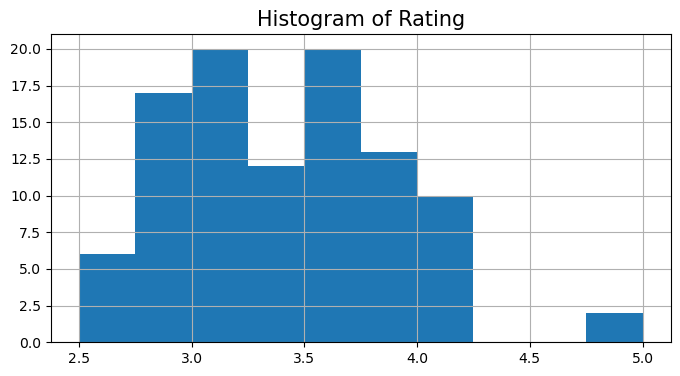

In [204]:
import matplotlib.pyplot as plt
import seaborn as sn

df_subset = df.iloc[:100, 6] 
df_subset.hist(bins=10, figsize=(8, 4))
plt.title("Histogram of Rating", size = 15)
plt.show

In [206]:
# Remove '%' and convert to float, then divide by 100 to get decimal values
df['CocoaPercent'] = df['CocoaPercent'].replace('%', '', regex=True).astype(float) / 100

# Check the result
print(df['CocoaPercent'].head())

0    0.63
1    0.70
2    0.70
3    0.70
4    0.70
Name: CocoaPercent, dtype: float64


#Plot the converted numerical Cocoa Percent values against the Rating values!
#scatter plot with small alpha, e.g., 0.1, to flush out the density of each point.

plt.scatter(df["Rating"],df["CocoaPercent"], alpha = 0.1, color="purple")
plt.title("Predicting Cocoa Quantity Based on Rating", size = 15)
plt.xlabel("Rating")
plt.ylabel("CocoaPercent")
plt.show()